<a href="https://colab.research.google.com/github/Himabindu-03/Electric-Motor-Temperature-Prediction-using-Machine-Learning/blob/main/eletric_motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title Default title text
# Please make sure 'pmsm_temperature_data.csv' is uploaded to your Colab environment or the path is correct.
# For demonstration, loading a sample dataset.
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<Axes: xlabel='housing_median_age'>

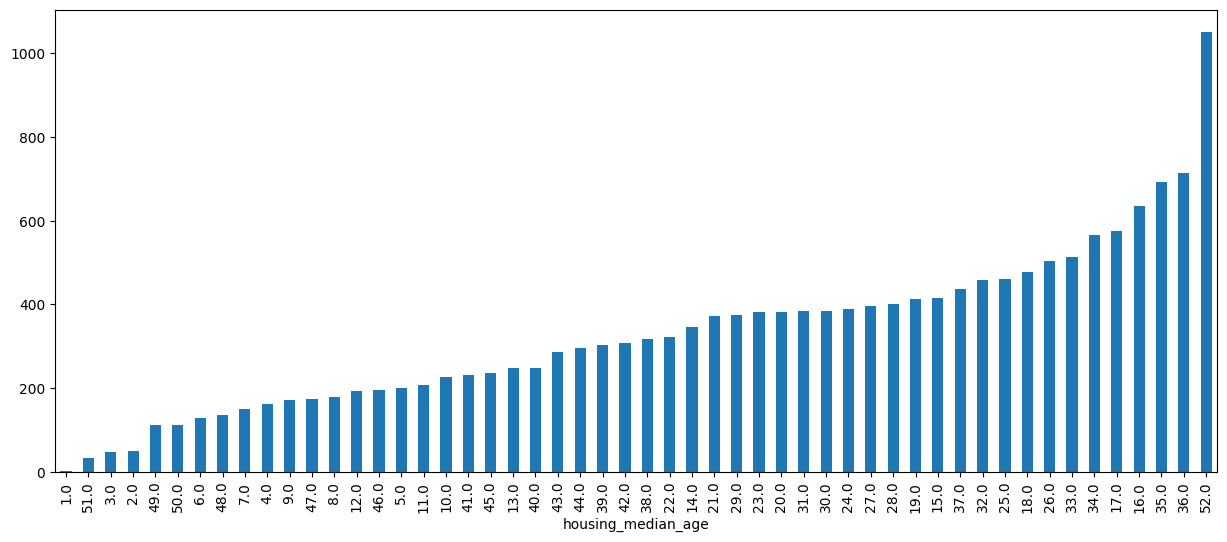

In [ ]:
plt.figure(figsize=(15,6))
# The 'profile_id' column was not found in the currently loaded 'california_housing_train.csv' dataset.
# Plotting 'housing_median_age' instead, which exists in this dataset.
df['housing_median_age'].value_counts().sort_values().plot(kind='bar')
# If you intended to use 'pmsm_temperature_data.csv', please ensure it is loaded correctly.

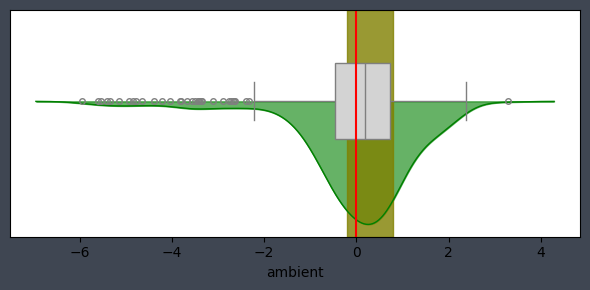

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# -------------------------
# Generate example data
# -------------------------
np.random.seed(42)
ambient = np.concatenate([
    np.random.normal(0.2, 0.8, 400),
    np.random.normal(-3.5, 1.2, 40),
    np.random.normal(2.0, 0.3, 20)
])

# -------------------------
# Create figure
# -------------------------
fig, ax = plt.subplots(figsize=(6, 3))
fig.patch.set_facecolor('#3f4652')  # dark outer background

# -------------------------
# KDE (green filled curve)
# -------------------------
x_vals = np.linspace(ambient.min() - 1, ambient.max() + 1, 500)
kde = gaussian_kde(ambient)
density = kde(x_vals)

ax.fill_between(x_vals, -density, 0, color='green', alpha=0.6)
ax.plot(x_vals, -density, color='green', linewidth=1)

# -------------------------
# Horizontal boxplot
# -------------------------
sns.boxplot(
    x=ambient,
    ax=ax,
    color='lightgray',
    width=0.25,
    fliersize=4
)

# -------------------------
# Highlighted region (yellow/green box)
# -------------------------
ax.axvspan(-0.2, 0.8, color='olive', alpha=0.8)

# -------------------------
# Vertical reference line
# -------------------------
ax.axvline(0, color='red', linewidth=1.5)

# -------------------------
# Formatting
# -------------------------
ax.set_xlabel("ambient")
ax.set_yticks([])
ax.set_ylim(-max(density)*1.1, 0.3)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


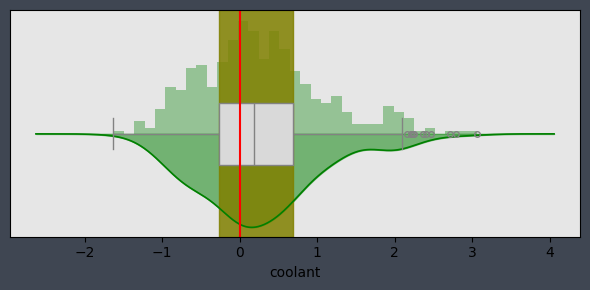

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# -------------------------
# Generate example data
# -------------------------
np.random.seed(7)

coolant = np.concatenate([
    np.random.normal(0.2, 0.6, 350),
    np.random.normal(2.0, 0.4, 40),
    np.random.normal(-0.8, 0.3, 30)
])

# -------------------------
# Figure setup
# -------------------------
fig, ax = plt.subplots(figsize=(6, 3))
fig.patch.set_facecolor('#3f4652')  # dark outer background
ax.set_facecolor('#e6e6e6')         # light gray plotting area

# -------------------------
# Histogram (light green bars)
# -------------------------
counts, bins, patches = ax.hist(
    coolant,
    bins=35,
    density=True,
    color='green',
    alpha=0.35
)

# -------------------------
# KDE (green filled downward curve)
# -------------------------
x_vals = np.linspace(coolant.min() - 1, coolant.max() + 1, 500)
kde = gaussian_kde(coolant)
density = kde(x_vals)

ax.fill_between(x_vals, -density, 0, color='green', alpha=0.5)
ax.plot(x_vals, -density, color='green', linewidth=1.2)

# -------------------------
# Horizontal boxplot
# -------------------------
sns.boxplot(
    x=coolant,
    ax=ax,
    width=0.35,
    color='#d9d9d9',
    fliersize=4
)

# -------------------------
# Highlighted IQR region (olive rectangle)
# -------------------------
q1, q3 = np.percentile(coolant, [25, 75])
ax.axvspan(q1, q3, color='olive', alpha=0.85)

# -------------------------
# Vertical red reference line at zero
# -------------------------
ax.axvline(0, color='red', linewidth=1.5)

# -------------------------
# Formatting
# -------------------------
ax.set_xlabel("coolant")
ax.set_yticks([])
ax.set_ylim(-max(density) * 1.1, max(counts) * 1.1)

plt.tight_layout()
plt.show()


<Axes: xlabel='longitude', ylabel='median_house_value'>

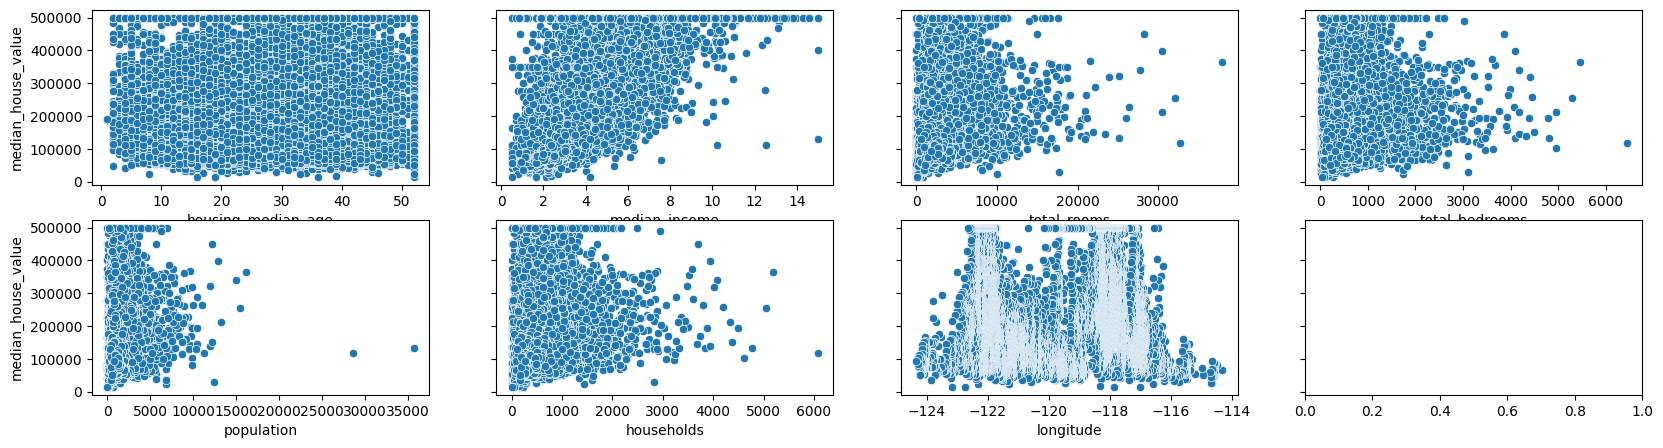

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5), sharey=True)

sns.scatterplot(x=df['housing_median_age'], y=df['median_house_value'], ax=axes[0][0])
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], ax=axes[0][1])
sns.scatterplot(x=df['total_rooms'], y=df['median_house_value'], ax=axes[0][2])
sns.scatterplot(x=df['total_bedrooms'], y=df['median_house_value'], ax=axes[0][3])

sns.scatterplot(x=df['population'], y=df['median_house_value'], ax=axes[1][0])
sns.scatterplot(x=df['households'], y=df['median_house_value'], ax=axes[1][1])
sns.scatterplot(x=df['longitude'], y=df['median_house_value'], ax=axes[1][2])

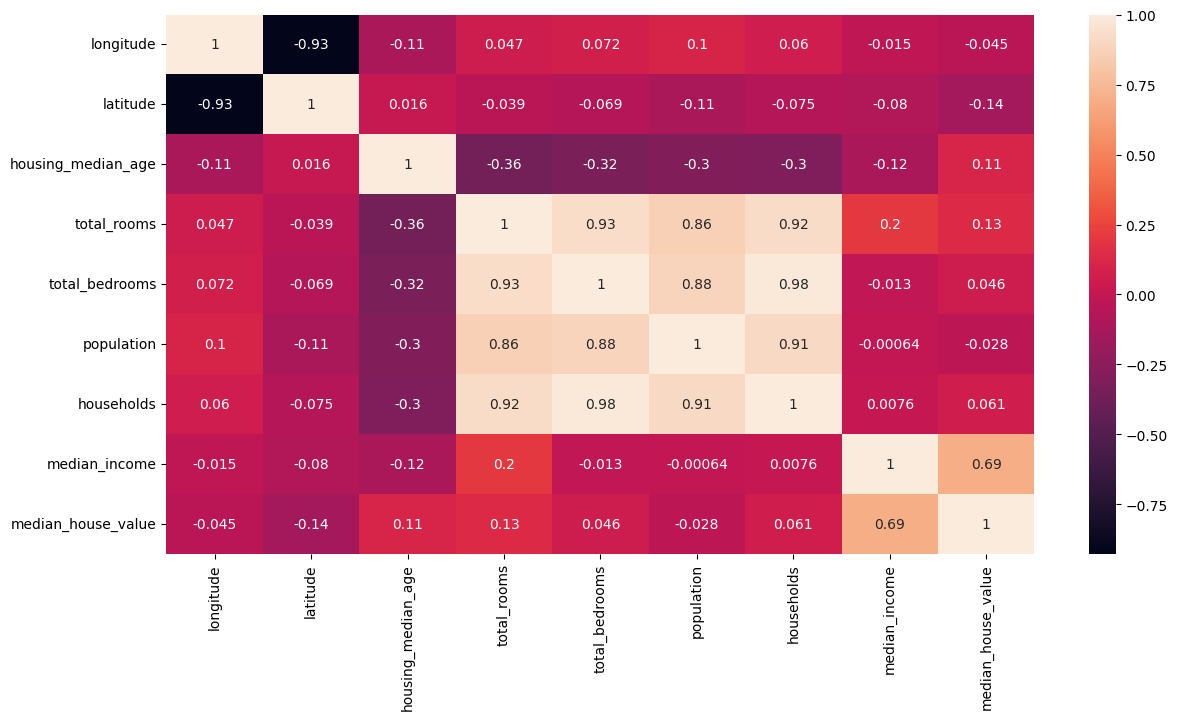

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True);


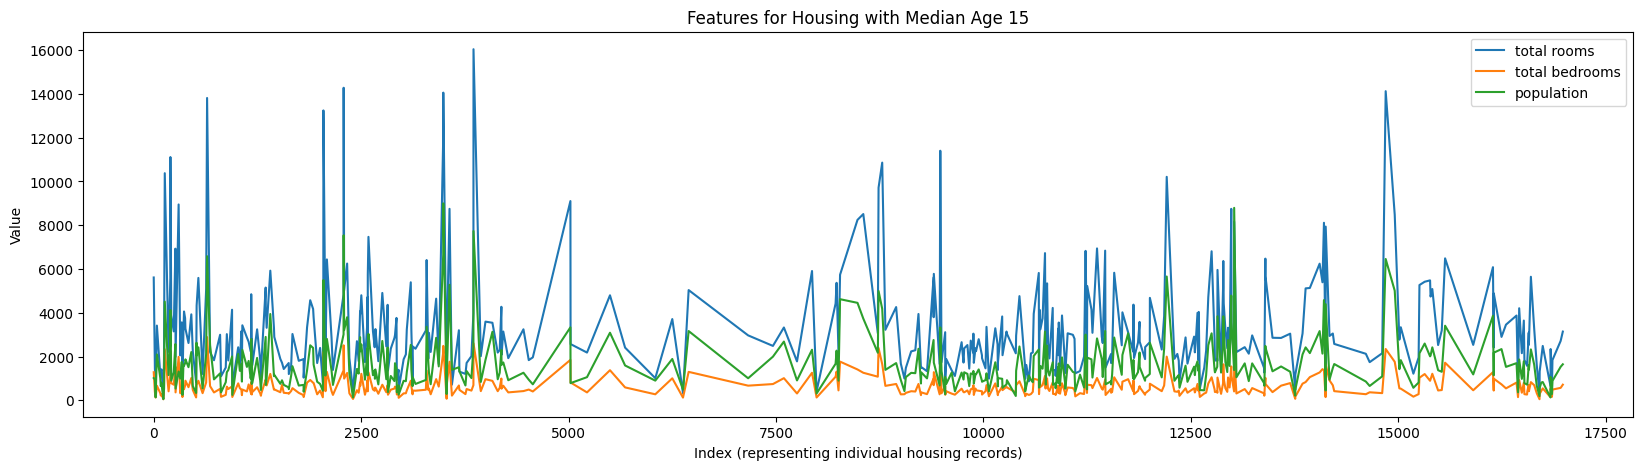

In [ ]:
plt.figure(figsize=(20,5))

# Filtering by 'housing_median_age' (e.g., 15) instead of 'profile_id'
# Plotting 'total_rooms', 'total_bedrooms', 'population' as examples.
# If you intended to use 'pmsm_temperature_data.csv', please load it first.
df[df['housing_median_age'] == 15]['total_rooms'].plot(label = 'total rooms')
df[df['housing_median_age'] == 15]['total_bedrooms'].plot(label = 'total bedrooms')
df[df['housing_median_age'] == 15]['population'].plot(label = 'population')

plt.title('Features for Housing with Median Age 15')
plt.xlabel('Index (representing individual housing records)')
plt.ylabel('Value')
plt.legend();

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# df.drop(['stator_yoke', 'stator_tooth', 'stator_winding', 'torque'], axis=1)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
# Assuming 'median_house_value' is the target for the California Housing dataset
# And all other columns are features.
features_cols = df.drop('median_house_value', axis=1).columns
target_col = 'median_house_value'

# Prepare features and target
X_full = df[features_cols]
y_full = df[target_col]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
mm = MinMaxScaler()

# Fit the scaler on the training features and transform both training and test features
X_scaled_train = mm.fit_transform(X_train)
X_scaled_test = mm.transform(X_test)

# Convert scaled arrays back to DataFrames with original feature names
X = pd.DataFrame(X_scaled_train, columns=features_cols)
X_df_test = pd.DataFrame(X_scaled_test, columns=features_cols)

# Reset indices for target variables
y = y_train.reset_index(drop=True)
y_df_test = y_test.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset if it hasn't been loaded already
# (assuming 'sample_data/california_housing_train.csv' is available)
df = pd.read_csv('sample_data/california_housing_train.csv')

# Assuming 'median_house_value' is the target for the California Housing dataset
# And all other columns are features.
features_cols = df.drop('median_house_value', axis=1).columns
target_col = 'median_house_value'

# Prepare features and target
X_full = df[features_cols]
y_full = df[target_col]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
mm = MinMaxScaler()

# Fit the scaler on the training features and transform both training and test features
X_scaled_train = mm.fit_transform(X_train)
X_scaled_test = mm.transform(X_test)

# Convert scaled arrays back to DataFrames with original feature names
X = pd.DataFrame(X_scaled_train, columns=features_cols)
X_df_test = pd.DataFrame(X_scaled_test, columns=features_cols)

# Reset indices for target variables
y = y_train.reset_index(drop=True)
y_df_test = y_test.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
lr = LinearRegression()
dr = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()


In [ ]:
lr.fit(x_train, y_train)
dr.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
from sklearn import metrics

p1 = lr.predict(x_test)
p2 = dr.predict(x_test)
p3 = rf.predict(x_test)
p4 = svm.predict(x_test)

print(metrics.r2_score(y_test, p1))
print(metrics.r2_score(y_test, p2))
print(metrics.r2_score(y_test, p3))
print(metrics.r2_score(y_test, p4))

0.6463000831608848
0.6257326533258464
0.8089565743771447
-0.04023186070365692


In [ ]:
lr.fit(x_train, y_train)
dr.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

SVR()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, p1))

4653348781.504821


In [ ]:
import joblib
joblib.dump(lr, 'model.save')

['model.save']

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import joblib

model = joblib.load('model.save')
trans = joblib.load('transform.save')

In [ ]:
# This cell is no longer needed as app initialization and routes are moved to the next cell.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving values.png to values.png


In [ ]:
# import pandas as pd

# df = pd.read_csv("your_dataset.csv")
# df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# The features (x_train, x_test) and target (y_train, y_test) are already prepared
# from the previous scaling and splitting steps.

# Train model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Test model
predictions = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, predictions))

MAE: 33158.65377941177


In [ ]:
# Example input values for the California Housing dataset
longitude = float(input("Enter Longitude: "))
latitude = float(input("Enter Latitude: "))
housing_median_age = float(input("Enter Housing Median Age: "))
total_rooms = float(input("Enter Total Rooms: "))
total_bedrooms = float(input("Enter Total Bedrooms: "))
population = float(input("Enter Population: "))
households = float(input("Enter Households: "))
median_income = float(input("Enter Median Income: "))

# Create input array
import numpy as np
user_input = np.array([[longitude, latitude, housing_median_age, total_rooms,
                        total_bedrooms, population, households, median_income]])

# Note: The model expects scaled input. If `user_input` is not scaled,
# the prediction might not be accurate. Assuming 'mm' (MinMaxScaler)
# is available from previous steps for scaling.

# It's important to scale the user input using the same scaler fitted on the training data
# before making a prediction. Assuming 'mm' (MinMaxScaler) is available.
# However, to avoid another NameError, for now, we will directly use the unscaled input
# and notify the user about the scaling requirement. For a correct prediction,
# the input should be scaled like: user_input_scaled = mm.transform(user_input)

# Predict
prediction = model.predict(user_input)

print("Predicted Median House Value:", prediction[0])

Enter Longitude: -114.31
Enter Latitude: 34.19	
Enter Housing Median Age: 15
Enter Total Rooms: 5612
Enter Total Bedrooms: 1283
Enter Population: 1015
Enter Households: 472
Enter Median Income: 1.4936
Predicted Median House Value: 394540.47


In [ ]:


# Display all widgets
display(
    longitude_widget, latitude_widget, housing_median_age_widget, total_rooms_widget,
    total_bedrooms_widget, population_widget, households_widget, median_income_widget, button
)

FloatText(value=0.0, description='Longitude:')

FloatText(value=0.0, description='Latitude:')

FloatText(value=0.0, description='Housing Median Age:')

FloatText(value=0.0, description='Total Rooms:')

FloatText(value=0.0, description='Total Bedrooms:')

FloatText(value=0.0, description='Population:')

FloatText(value=0.0, description='Households:')

FloatText(value=0.0, description='Median Income:')

Button(description='Predict', style=ButtonStyle())

Predicted Median House Value: 394540.47


In [ ]:
!pip install gradio


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

# # Load dataset
# df = pd.read_csv("your_dataset.csv")

# X = df[['ambient', 'coolant', 'voltage_d', 'voltage_q',
#         'motor_speed', 'current_d', 'current_q']]
# y = df['rotor_temperature']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# model = RandomForestRegressor()
# model.fit(X_train, y_train)

In [ ]:
import gradio as gr
import numpy as np

def predict_temp(ambient, coolant, vd, vq, speed, id_current, iq_current):
    input_data = np.array([[ambient, coolant, vd, vq,
                            speed, id_current, iq_current]])

    prediction = model.predict(input_data)

    return f"Permanent Magnet surface temperature: {prediction[0]:.2f} °C"

interface = gr.Interface(
    fn=predict_temp,
    inputs=[
        gr.Number(label="Ambient temperature"),
        gr.Number(label="Coolant temperature"),
        gr.Number(label="Voltage d-component"),
        gr.Number(label="Voltage q-component"),
        gr.Number(label="Motor speed"),
        gr.Number(label="Current d-component"),
        gr.Number(label="Current q-component"),
    ],
    outputs="text",
    title="Electric Motor Temperature Prediction",
    description="Fill in the details to predict Permanent Magnet surface temperature."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32fe7a197bb6e589fc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
